# Imports and installs

In [1]:
!python --version

Python 3.6.9


In [2]:
import pandas as pd
pd.__version__

'1.1.4'

In [3]:
import cv2
print(cv2.__version__)

4.1.2


In [4]:
import numpy as np
np.__version__

'1.18.5'

In [5]:
!pip install keras

In [6]:
import tensorflow.keras

In [7]:
from tensorflow.keras.layers import Input,Dense,Flatten, Dropout

In [8]:
from tensorflow.keras.models import Model

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
_KERAS_BACKEND = tensorflow.keras.backend
_KERAS_LAYERS = tensorflow.keras.layers
_KERAS_MODELS = tensorflow.keras.models
_KERAS_UTILS = tensorflow.keras.utils

# Step 1: Download Dataset

**Shenzhen Hospital X-ray Set:** X-ray images in this data set have been collected by Shenzhen No.3 Hospital in Shenzhen, Guangdong providence, China. The x-rays were acquired as part of the routine care at Shenzhen Hospital. The set contains images in JPEG format. 

In [11]:
!wget https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip

--2020-11-28 17:22:49--  https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3770205534 (3.5G) [application/zip]
Saving to: ‘ChinaSet_AllFiles.zip’

ChinaSet_AllFiles.z 100%[===================>]   3.51G  8.88MB/s    in 6m 47s  

2020-11-28 17:29:36 (8.84 MB/s) - ‘ChinaSet_AllFiles.zip’ saved [3770205534/3770205534]



In [12]:
ls

ChinaSet_AllFiles.zip  sample_data/


In [13]:
!unzip ChinaSet_AllFiles.zip -d images/ 

Archive:  ChinaSet_AllFiles.zip
   creating: images/ChinaSet_AllFiles/ClinicalReadings/
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0001_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0002_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0003_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0004_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0005_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0006_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0007_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0008_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0009_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0010_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0011_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0012_0.txt  
 extracting:

In [14]:
ls images/ChinaSet_AllFiles

ClinicalReadings/  CXR_png/  NLM-ChinaCXRSet-ReadMe.docx


In [15]:
rm ChinaSet_AllFiles.zip

In [16]:
rm images/ChinaSet_AllFiles/CXR_png/Thumbs.db

In [17]:
!rm -rf images/ChinaSet_AllFiles/ClinicalReadings/

In [18]:
!rm images/ChinaSet_AllFiles/NLM-ChinaCXRSet-ReadMe.docx

### new dataset download

In [19]:
!wget http://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip

URL transformed to HTTPS due to an HSTS policy
--2020-11-28 17:30:44--  https://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616853875 (588M) [application/zip]
Saving to: ‘NLM-MontgomeryCXRSet.zip’

NLM-MontgomeryCXRSe 100%[===================>] 588.28M  8.71MB/s    in 68s     

2020-11-28 17:31:52 (8.68 MB/s) - ‘NLM-MontgomeryCXRSet.zip’ saved [616853875/616853875]



In [20]:
!unzip NLM-MontgomeryCXRSet.zip -d images/ 

Archive:  NLM-MontgomeryCXRSet.zip
   creating: images/MontgomerySet/
   creating: images/MontgomerySet/ClinicalReadings/
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0001_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0002_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0003_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0004_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0005_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0006_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0008_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0011_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0013_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0015_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0016_0.txt  
  inflating: images/MontgomerySet/ClinicalReadings/MCUCXR_0017_0.txt  
  inflating: images/Montgo

In [21]:
!rm images/MontgomerySet/CXR_png/Thumbs.db

In [22]:
!mv images/MontgomerySet/CXR_png/* images/ChinaSet_AllFiles/CXR_png/

# Step 2: Prepare Dataset csv file

In [23]:
# prepare dataset.csv file

import os
import csv

def parseTxtFile(filename):
  print("filename is ====> ", filename)
  temp = filename.split("." )
  temp = str(temp[0])
  temp = temp.split("_")
  label = temp[2]
  text = [filename, label]

  with open('dataset.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(text)
    csvFile.close()

        
             

datasetDir = os.path.join(os.getcwd(), "images/ChinaSet_AllFiles/CXR_png/")

for file_name in os.listdir(datasetDir):
             parseTxtFile(file_name)

filename is ====>  CHNCXR_0388_1.png
filename is ====>  MCUCXR_0059_0.png
filename is ====>  CHNCXR_0367_1.png
filename is ====>  CHNCXR_0494_1.png
filename is ====>  MCUCXR_0162_1.png
filename is ====>  CHNCXR_0176_0.png
filename is ====>  MCUCXR_0083_0.png
filename is ====>  CHNCXR_0242_0.png
filename is ====>  CHNCXR_0502_1.png
filename is ====>  CHNCXR_0517_1.png
filename is ====>  CHNCXR_0470_1.png
filename is ====>  CHNCXR_0069_0.png
filename is ====>  CHNCXR_0414_1.png
filename is ====>  MCUCXR_0017_0.png
filename is ====>  CHNCXR_0106_0.png
filename is ====>  CHNCXR_0227_0.png
filename is ====>  CHNCXR_0479_1.png
filename is ====>  CHNCXR_0393_1.png
filename is ====>  CHNCXR_0252_0.png
filename is ====>  CHNCXR_0630_1.png
filename is ====>  CHNCXR_0659_1.png
filename is ====>  CHNCXR_0561_1.png
filename is ====>  CHNCXR_0013_0.png
filename is ====>  MCUCXR_0045_0.png
filename is ====>  CHNCXR_0641_1.png
filename is ====>  CHNCXR_0095_0.png
filename is ====>  CHNCXR_0130_0.png
f

In [24]:
import pandas as pd
original_dataset = pd.read_csv("dataset.csv", header=None)
print(original_dataset.shape)
print("\n\n",original_dataset.head())

(800, 2)


                    0  1
0  CHNCXR_0388_1.png  1
1  MCUCXR_0059_0.png  0
2  CHNCXR_0367_1.png  1
3  CHNCXR_0494_1.png  1
4  MCUCXR_0162_1.png  1


In [25]:
original_dataset.columns = ["filename", "category"]

# Step 3: Dataset Statistical analysis

**Dataset info**

https://ceb.nlm.nih.gov/repositories/tuberculosis-chest-x-ray-image-data-sets/


In [26]:
import matplotlib.pyplot as plt

In [27]:
x = np.arange(2)

In [28]:
y = original_dataset['category'].value_counts()
y[0:2]

0    406
1    394
Name: category, dtype: int64

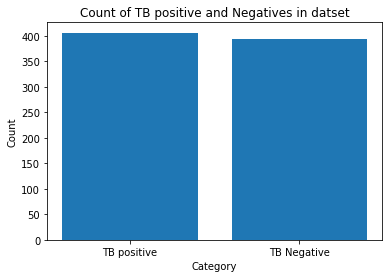

In [29]:
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, ('TB positive', 'TB Negative'))
ax.set_xlabel("Category")
ax.set_ylabel("Count")
plt.title('Count of TB positive and Negatives in datset')
plt.show()

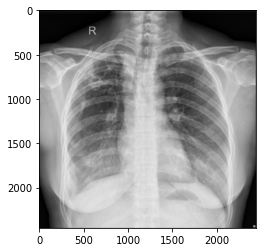

In [30]:
import cv2
from matplotlib.pyplot import imshow

def show_single_image(image_arr):
  imshow(np.asarray(image_arr))
  
sample_image = cv2.imread("/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0575_1.png")
show_single_image(sample_image)

In [31]:
print(sample_image.dtype)
print(sample_image.shape)

uint8
(2453, 2443, 3)


In [32]:
print("Minimum pixel intensity: ",sample_image.min())
print("Maximum pixel intensity: ",sample_image.max())
print("Mean pixel intensity: ",sample_image.mean())
print("Shape of image: ",sample_image.shape)
print("Height of image: ",sample_image.shape[0])
print("Height of image: ",sample_image.shape[1])
print('Dimension or chanels of Image  {}'.format(sample_image.ndim))

Minimum pixel intensity:  0
Maximum pixel intensity:  255
Mean pixel intensity:  141.95463214365395
Shape of image:  (2453, 2443, 3)
Height of image:  2453
Height of image:  2443
Dimension or chanels of Image  3


# Step 4: Image Data generator

In [33]:
original_dataset.shape

(800, 2)

In [34]:
def prepend_path(fn):
    return "/content/images/ChinaSet_AllFiles/CXR_png/"+fn

original_dataset['filename'] = original_dataset['filename'].apply(prepend_path)

In [35]:
original_dataset = original_dataset.applymap(str)

In [36]:
original_dataset.tail()

,filename,category
795,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,1
796,/content/images/ChinaSet_AllFiles/CXR_png/MCUC...,1
797,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,0
798,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,1
799,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,0


In [37]:
auto_target_size = (128, 128)
auto_batch_size = 32

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

nn_datagen = ImageDataGenerator(
            
            rescale=1./255,
            zoom_range=0.1,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            validation_split=0.2 )


nn_train_generator = nn_datagen.flow_from_dataframe(
                            dataframe = original_dataset,
                            subset="training",
    
                            x_col= 'filename', 
                            y_col= 'category',
                            batch_size=auto_batch_size,
                            seed=42,
                            shuffle=True,
                            class_mode="categorical",
                            target_size=auto_target_size,
                            color_mode =  "rgb")


nn_valid_generator = nn_datagen.flow_from_dataframe(
                                dataframe = original_dataset,
                                subset="validation",
    
                                x_col= 'filename', 
                                y_col= 'category',
                                batch_size=auto_batch_size,
                                seed=42,
                                shuffle=True,
                                class_mode="categorical",
                            target_size=auto_target_size,
                                color_mode =  "rgb")


Found 640 validated image filenames belonging to 2 classes.
Found 160 validated image filenames belonging to 2 classes.


In [39]:
for image_batch, label_batch in nn_valid_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 128, 128, 3)
Label batch shape:  (32, 2)


In [40]:
nn_test_datagen = ImageDataGenerator(
            rescale=1./255,
            validation_split=0.2 )

nn_validation_test_generator = nn_test_datagen.flow_from_dataframe(
                                dataframe = original_dataset,
                                subset="validation",
    
                                x_col= 'filename', 
                                y_col= 'category',
                                batch_size=auto_batch_size,
                                seed=42,
                                shuffle=False,
                                class_mode="categorical",
                            target_size=auto_target_size,
                                color_mode =  "rgb")

Found 160 validated image filenames belonging to 2 classes.


# Step 5: Model def

In [41]:
def get_submodules_from_kwargs(kwargs):
    backend = kwargs.get('backend', _KERAS_BACKEND)
    layers = kwargs.get('layers', _KERAS_LAYERS)
    models = kwargs.get('models', _KERAS_MODELS)
    utils = kwargs.get('utils', _KERAS_UTILS)
    for key in kwargs.keys():
        if key not in ['backend', 'layers', 'models', 'utils']:
            raise TypeError('Invalid keyword argument: %s', key)
    return backend, layers, models, utils

In [42]:

def _obtain_input_shape(input_shape,
                        default_size,
                        min_size,
                        data_format,
                        require_flatten,
                        weights=None):
    """Internal utility to compute/validate a model's input shape.
    # Arguments
        input_shape: Either None (will return the default network input shape),
            or a user-provided shape to be validated.
        default_size: Default input width/height for the model.
        min_size: Minimum input width/height accepted by the model.
        data_format: Image data format to use.
        require_flatten: Whether the model is expected to
            be linked to a classifier via a Flatten layer.
        weights: One of `None` (random initialization)
            or 'imagenet' (pre-training on ImageNet).
            If weights='imagenet' input channels must be equal to 3.
    # Returns
        An integer shape tuple (may include None entries).
    # Raises
        ValueError: In case of invalid argument values.
    """
    if weights != 'imagenet' and input_shape and len(input_shape) == 3:
        if data_format == 'channels_first':
            if input_shape[0] not in {1, 3}:
                warnings.warn(
                    'This model usually expects 1 or 3 input channels. '
                    'However, it was passed an input_shape with ' +
                    str(input_shape[0]) + ' input channels.')
            default_shape = (input_shape[0], default_size, default_size)
        else:
            if input_shape[-1] not in {1, 3}:
                warnings.warn(
                    'This model usually expects 1 or 3 input channels. '
                    'However, it was passed an input_shape with ' +
                    str(input_shape[-1]) + ' input channels.')
            default_shape = (default_size, default_size, input_shape[-1])
    else:
        if data_format == 'channels_first':
            default_shape = (3, default_size, default_size)
        else:
            default_shape = (default_size, default_size, 3)
    if weights == 'imagenet' and require_flatten:
        if input_shape is not None:
            if input_shape != default_shape:
                raise ValueError('When setting `include_top=True` '
                                 'and loading `imagenet` weights, '
                                 '`input_shape` should be ' +
                                 str(default_shape) + '.')
        return default_shape
    if input_shape:
        if data_format == 'channels_first':
            if input_shape is not None:
                if len(input_shape) != 3:
                    raise ValueError(
                        '`input_shape` must be a tuple of three integers.')
                if input_shape[0] != 3 and weights == 'imagenet':
                    raise ValueError('The input must have 3 channels; got '
                                     '`input_shape=' + str(input_shape) + '`')
                if ((input_shape[1] is not None and input_shape[1] < min_size) or
                   (input_shape[2] is not None and input_shape[2] < min_size)):
                    raise ValueError('Input size must be at least ' +
                                     str(min_size) + 'x' + str(min_size) +
                                     '; got `input_shape=' +
                                     str(input_shape) + '`')
        else:
            if input_shape is not None:
                if len(input_shape) != 3:
                    raise ValueError(
                        '`input_shape` must be a tuple of three integers.')
                if input_shape[-1] != 3 and weights == 'imagenet':
                    raise ValueError('The input must have 3 channels; got '
                                     '`input_shape=' + str(input_shape) + '`')
                if ((input_shape[0] is not None and input_shape[0] < min_size) or
                   (input_shape[1] is not None and input_shape[1] < min_size)):
                    raise ValueError('Input size must be at least ' +
                                     str(min_size) + 'x' + str(min_size) +
                                     '; got `input_shape=' +
                                     str(input_shape) + '`')
    else:
        if require_flatten:
            input_shape = default_shape
        else:
            if data_format == 'channels_first':
                input_shape = (3, None, None)
            else:
                input_shape = (None, None, 3)
    if require_flatten:
        if None in input_shape:
            raise ValueError('If `include_top` is True, '
                             'you should specify a static `input_shape`. '
                             'Got `input_shape=' + str(input_shape) + '`')
    return input_shape


In [43]:
BASE_WEIGTHS_PATH = (
    'https://github.com/keras-team/keras-applications/'
    'releases/download/densenet/')
DENSENET121_WEIGHT_PATH = (
    BASE_WEIGTHS_PATH +
    'densenet121_weights_tf_dim_ordering_tf_kernels.h5')
DENSENET121_WEIGHT_PATH_NO_TOP = (
    BASE_WEIGTHS_PATH +
    'densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [44]:
def dense_block(x, blocks, name):
    """A dense block.
    # Arguments
        x: input tensor.
        blocks: integer, the number of building blocks.
        name: string, block label.
    # Returns
        output tensor for the block.
    """
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x


def transition_block(x, reduction, name):
    """A transition block.
    # Arguments
        x: input tensor.
        reduction: float, compression rate at transition layers.
        name: string, block label.
    # Returns
        output tensor for the block.
    """
    bn_axis = 3 if backend.image_data_format() == 'channels_last' else 1
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                  name=name + '_bn')(x)
    x = layers.Activation('relu', name=name + '_relu')(x)
    x = layers.Conv2D(int(backend.int_shape(x)[bn_axis] * reduction), 1,
                      use_bias=False,
                      name=name + '_conv')(x)
    x = layers.AveragePooling2D(2, strides=2, name=name + '_pool')(x)
    return x


def conv_block(x, growth_rate, name):
    """A building block for a dense block.
    # Arguments
        x: input tensor.
        growth_rate: float, growth rate at dense layers.
        name: string, block label.
    # Returns
        Output tensor for the block.
    """
    bn_axis = 3 if backend.image_data_format() == 'channels_last' else 1
    x1 = layers.BatchNormalization(axis=bn_axis,
                                   epsilon=1.001e-5,
                                   name=name + '_0_bn')(x)
    x1 = layers.Activation('relu', name=name + '_0_relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, 1,
                       use_bias=False,
                       name=name + '_1_conv')(x1)
    x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                   name=name + '_1_bn')(x1)
    x1 = layers.Activation('relu', name=name + '_1_relu')(x1)
    x1 = layers.Conv2D(growth_rate, 3,
                       padding='same',
                       use_bias=False,
                       name=name + '_2_conv')(x1)
    x = layers.Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])
    return x

In [45]:
def DenseNet(blocks,
             include_top=True,
             weights='imagenet',
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=1000,
             **kwargs):

    global backend, layers, models, keras_utils
    backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=32,
                                      data_format=backend.image_data_format(),
                                      require_flatten=include_top,
                                      weights=weights)

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    bn_axis = 3 if backend.image_data_format() == 'channels_last' else 1

    x = layers.ZeroPadding2D(padding=((3, 3), (3, 3)))(img_input)
    x = layers.Conv2D(64, 7, strides=2, use_bias=False, name='conv1/conv')(x)
    x = layers.BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='conv1/bn')(x)
    x = layers.Activation('relu', name='conv1/relu')(x)
    x = layers.ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
    x = layers.MaxPooling2D(3, strides=2, name='pool1')(x)

    x = dense_block(x, blocks[0], name='conv2')
    x = transition_block(x, 0.5, name='pool2')
    x = dense_block(x, blocks[1], name='conv3')
    x = transition_block(x, 0.5, name='pool3')
    x = dense_block(x, blocks[2], name='conv4')
    x = transition_block(x, 0.5, name='pool4')
    x = dense_block(x, blocks[3], name='conv5')

    x = layers.BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='bn')(x)
    x = layers.Activation('relu', name='relu')(x)

    if include_top:
        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D(name='max_pool')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = keras_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input

    # Create model.
    if blocks == [6, 12, 24, 16]:
        model = models.Model(inputs, x, name='densenet121')
    elif blocks == [6, 12, 32, 32]:
        model = models.Model(inputs, x, name='densenet169')
    elif blocks == [6, 12, 48, 32]:
        model = models.Model(inputs, x, name='densenet201')
    else:
        model = models.Model(inputs, x, name='densenet')

    # Load weights.
    if weights == 'imagenet':
        if include_top:
            if blocks == [6, 12, 24, 16]:
                weights_path = keras_utils.get_file(
                    'densenet121_weights_tf_dim_ordering_tf_kernels.h5',
                    DENSENET121_WEIGHT_PATH,
                    cache_subdir='models',
                    file_hash='9d60b8095a5708f2dcce2bca79d332c7')
            elif blocks == [6, 12, 32, 32]:
                weights_path = keras_utils.get_file(
                    'densenet169_weights_tf_dim_ordering_tf_kernels.h5',
                    DENSENET169_WEIGHT_PATH,
                    cache_subdir='models',
                    file_hash='d699b8f76981ab1b30698df4c175e90b')
            elif blocks == [6, 12, 48, 32]:
                weights_path = keras_utils.get_file(
                    'densenet201_weights_tf_dim_ordering_tf_kernels.h5',
                    DENSENET201_WEIGHT_PATH,
                    cache_subdir='models',
                    file_hash='1ceb130c1ea1b78c3bf6114dbdfd8807')
        else:
            if blocks == [6, 12, 24, 16]:
                weights_path = keras_utils.get_file(
                    'densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    DENSENET121_WEIGHT_PATH_NO_TOP,
                    cache_subdir='models',
                    file_hash='30ee3e1110167f948a6b9946edeeb738')
            elif blocks == [6, 12, 32, 32]:
                weights_path = keras_utils.get_file(
                    'densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    DENSENET169_WEIGHT_PATH_NO_TOP,
                    cache_subdir='models',
                    file_hash='b8c4d4c20dd625c148057b9ff1c1176b')
            elif blocks == [6, 12, 48, 32]:
                weights_path = keras_utils.get_file(
                    'densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    DENSENET201_WEIGHT_PATH_NO_TOP,
                    cache_subdir='models',
                    file_hash='c13680b51ded0fb44dff2d8f86ac8bb1')
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model


def DenseNet121(include_top=True,
                weights='imagenet',
                input_tensor=None,
                input_shape=None,
                pooling=None,
                classes=1000,
                **kwargs):
    return DenseNet([6, 12, 24, 16],
                    include_top, weights,
                    input_tensor, input_shape,
                    pooling, classes,
                    **kwargs)

In [46]:
def preprocess_input(x, data_format=None, **kwargs):
    """Preprocesses a numpy array encoding a batch of images.
    # Arguments
        x: a 3D or 4D numpy array consists of RGB values within [0, 255].
        data_format: data format of the image tensor.
    # Returns
        Preprocessed array.
    """
    return imagenet_utils.preprocess_input(x, data_format,
                                           mode='torch', **kwargs)

# Step 6: Add classification head

In [47]:
densenet121_model = DenseNet121(include_top=False, 
                                weights='imagenet', 
                                input_tensor=None, 
                                input_shape=(128, 128, 3), 
                                pooling=max)

29089792/29084464 [==============================] - 0s 0us/step


In [48]:
# # Freeze the layers except the last 4 layers
# for layer in densenet121_model.layers[:5]:
#     layer.trainable = False
 
# # Check the trainable status of the individual layers
# for layer in densenet121_model.layers:
#     print(layer, layer.trainable)

In [49]:
# Create model for labelling images.
# act = 'relu'
act=tensorflow.keras.layers.LeakyReLU(alpha=0.3)

out = (densenet121_model.output)
out = Flatten()(out)
out = Dense(64, activation=act, name='dense1')(out)

out = Dropout(0.2)(out)
out = Dense(64, activation=act, name='dense2')(out)

out = Dropout(0.2)(out)
out = Dense(32, activation=act, name='dense3')(out)

out = Dropout(0.2)(out)
out = Dense(16, activation=act, name='dense4')(out)

out = Dense(2, activation='softmax')(out)

labeller = Model(densenet121_model.input, out)

print(labeller.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [50]:
optimizer = tensorflow.keras.optimizers.RMSprop(lr=1e-4)

# optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# optimizer =  keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

labeller.compile(optimizer=optimizer,
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

In [51]:
nb_epoch = 30

NN_STEP_SIZE_TRAIN = np.ceil(nn_train_generator.samples/nn_train_generator.batch_size)
NN_STEP_SIZE_VALID = np.ceil(nn_valid_generator.samples/nn_valid_generator.batch_size)

print(NN_STEP_SIZE_TRAIN, NN_STEP_SIZE_VALID)
print(nn_train_generator.samples, nn_valid_generator.samples)
print(nn_train_generator.batch_size, nn_valid_generator.batch_size)

20.0 5.0
640 160
32 32


In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks.
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc', 
    patience=15, 
    verbose=1, 
    factor=0.4, 
    min_lr=0.0000001)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=15, 
    verbose=1, 
    mode='auto')         

model_checkpoit = ModelCheckpoint(monitor='val_loss', 
                                  filepath='labeller_model' + '.hdf5',
                                  save_best_only=True, 
                                  save_weights_only=True,
                                  mode='min')

In [53]:
nn_train_generator.reset()
nn_valid_generator.reset()

In [54]:
history = labeller.fit_generator( generator = nn_train_generator,
                                  steps_per_epoch = NN_STEP_SIZE_TRAIN,
                                  validation_data = nn_valid_generator,
                                  validation_steps = NN_STEP_SIZE_VALID,                  
                                  epochs = nb_epoch,
                                  callbacks=[learning_rate_reduction, early_stopping, model_checkpoit])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
20/20 [==============================] - 132s 7s/step - loss: 0.7117 - accuracy: 0.6234 - val_loss: 0.6913 - val_accuracy: 0.5688
Epoch 2/30
20/20 [==============================] - 120s 6s/step - loss: 0.6268 - accuracy: 0.6859 - val_loss: 0.6824 - val_accuracy: 0.6750
Epoch 3/30
20/20 [==============================] - 99s 5s/step - loss: 0.5545 - accuracy: 0.7375 - val_loss: 0.9172 - val_accuracy: 0.5500
Epoch 4/30
20/20 [==============================] - 98s 5s/step - loss: 0.5370 - accuracy: 0.7453 - val_loss: 0.8205 - val_accuracy: 0.6062
Epoch 5/30
20/20 [==============================] - 98s 5s/step - loss: 0.5044 - accuracy: 0.7891 - val_loss: 1.0220 - val_accuracy: 0.5500
Epoch 6/30
20/20 [==============================] - 98s 5s/step - loss: 0.4737 - accuracy: 0.7969 - val_loss: 0.8710 - val_accuracy: 0.5437
Epoch 7/30
20/20 [==============================] - 99s 5s/step - loss: 0.4629 - a

In [55]:
history

# Step 7: Results

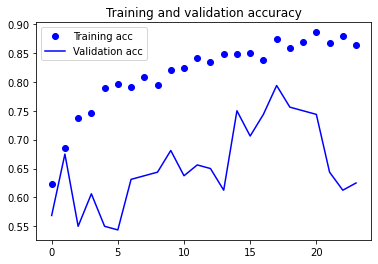

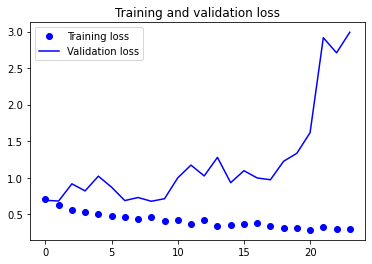

In [56]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [57]:
loaded_model = DenseNet121(include_top=False, 
                                weights='imagenet', 
                                input_tensor=None, 
                                input_shape=(128, 128, 3), 
                                pooling=max)

In [58]:
# Create model for labelling images.
# act = 'relu'
act=tensorflow.keras.layers.LeakyReLU(alpha=0.3)

out = (loaded_model.output)
out = Flatten()(out)
out = Dense(64, activation=act, name='dense1')(out)

out = Dropout(0.2)(out)
out = Dense(64, activation=act, name='dense2')(out)

out = Dropout(0.2)(out)
out = Dense(32, activation=act, name='dense3')(out)

out = Dropout(0.2)(out)
out = Dense(16, activation=act, name='dense4')(out)

out = Dense(2, activation='softmax')(out)

loaded_model = Model(loaded_model.input, out)

**upload weigghts file before continuing**

In [59]:
loaded_model.load_weights('labeller_model.hdf5')

In [60]:
optimizer = tensorflow.keras.optimizers.RMSprop(lr=1e-4)

# optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# optimizer =  keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

loaded_model.compile(optimizer=optimizer,
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

In [61]:
NN_STEP_SIZE_test = np.ceil(nn_validation_test_generator.samples/nn_validation_test_generator.batch_size)

In [62]:
nn_validation_test_generator.reset()
results_VALID_ds = loaded_model.evaluate_generator(nn_validation_test_generator, NN_STEP_SIZE_test, verbose=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
5/5 [==============================] - 15s 3s/step - loss: 0.8604 - accuracy: 0.6812


In [63]:
results_VALID_ds[1]

0.6812499761581421

# Step 8: Plot confusion matrix based on predictions on validation set

In [64]:
nn_validation_test_generator.reset()

validation_predictions = loaded_model.predict_generator(nn_validation_test_generator,
                                                    NN_STEP_SIZE_VALID, 
                                                    workers=1, 
                                                    use_multiprocessing=False,
                                                    verbose=1)

index_array_of_images = nn_validation_test_generator.index_array[:validation_predictions.shape[0]]

actual_labels = np.array(nn_validation_test_generator.classes)[index_array_of_images]
predicted_labels = np.argmax(validation_predictions[index_array_of_images], axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.
5/5 [==============================] - 15s 3s/step


In [65]:
actual_labels[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [66]:
predicted_labels[0:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [67]:
print(predicted_labels.shape)
print(np.array(actual_labels).shape)

print("Total number of images classified correctly = ",np.sum(actual_labels == predicted_labels))
print("hence accuracy = ", np.sum(actual_labels == predicted_labels) / predicted_labels.shape )

(160,)
(160,)
Total number of images classified correctly =  109
hence accuracy =  [0.68125]


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

Confusn_matrix_validation_set = confusion_matrix(actual_labels, predicted_labels)

print("prediction is done on ",np.sum(Confusn_matrix_validation_set)," number of examples\n")
print('Confusion Matrix')
print(Confusn_matrix_validation_set)


prediction is done on  160  number of examples

Confusion Matrix
[[85  0]
 [51 24]]


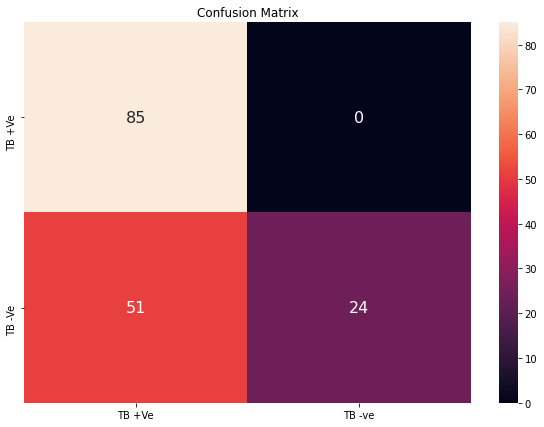

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix")
sn.heatmap(Confusn_matrix_validation_set, annot=True,fmt='g',annot_kws={"size": 16}, xticklabels = ['TB +Ve', 'TB -ve'], yticklabels = ['TB +Ve', 'TB -Ve'])

# Step 9: Check the predictions

In [70]:
nn_validation_test_generator.reset()
nn_sample_image_batch = next(nn_validation_test_generator)

In [71]:
type(nn_sample_image_batch)

tuple

In [72]:
len(nn_sample_image_batch[0])

32

In [73]:
sample_predictions = loaded_model.predict(nn_sample_image_batch[0],batch_size=32, verbose=1)

1/1 [==============================] - 0s 14ms/step


In [74]:
sample_predicted_labels = np.argmax(sample_predictions, axis=1) 

In [75]:
ground_truth_labels = nn_sample_image_batch[1]
ground_truth_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [76]:
ground_truth_labels = np.argmax(ground_truth_labels, axis=1) 
ground_truth_labels

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [77]:
sample_predicted_labels

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
np.sum(sample_predicted_labels == ground_truth_labels)

22

In [79]:
print("accurate predictions on sample batch: ", np.sum(sample_predicted_labels == ground_truth_labels)/32)

accurate predictions on sample batch:  0.6875


In [80]:
titles = []

for i in range(32):
  if sample_predicted_labels[i] == 0:        
    titles.append('TB')
  else:        
    titles.append('Not a TB')

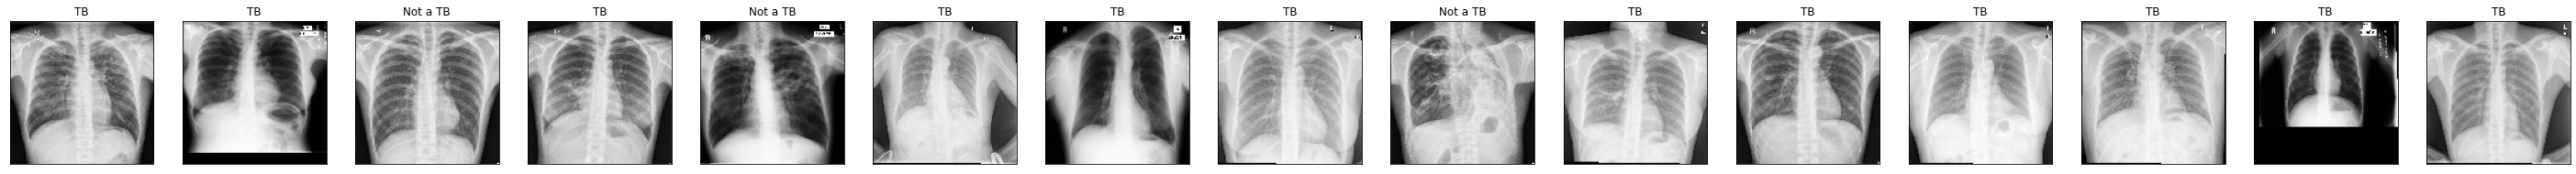

In [81]:
plt.figure(figsize=(50, 4))
for i in range(15):
    image = np.squeeze(nn_sample_image_batch[0][i])
    
    plt.subplot(1, 15, i+1)
    plt.imshow(image[:,:]) 
    plt.yticks([])
    plt.xticks([])
    plt.title(titles[i])
plt.show()    

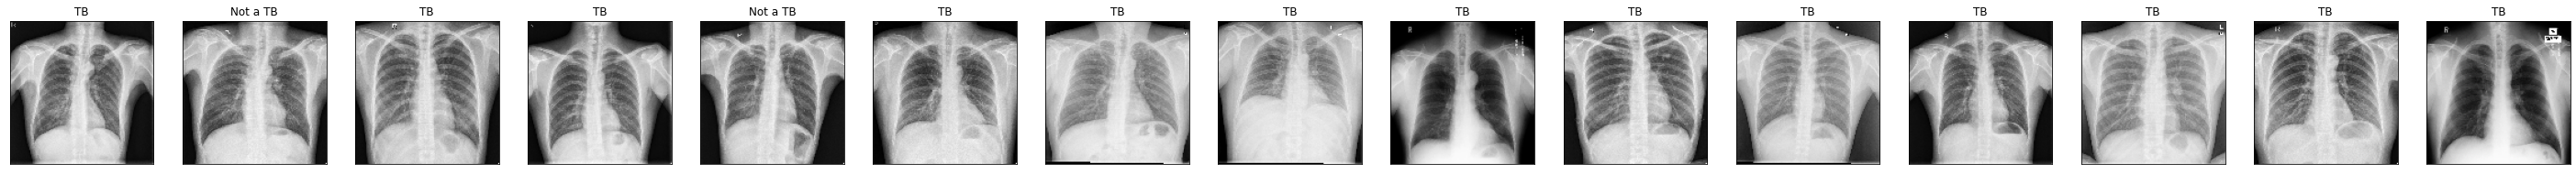

In [82]:
plt.figure(figsize=(50, 4))
for i in range(15):
    image = np.squeeze(nn_sample_image_batch[0][i+15])
    
    plt.subplot(1, 15, i+1)
    plt.imshow(image[:,:], cmap='gray') 
    plt.yticks([])
    plt.xticks([])
    plt.title(titles[i+15])
plt.show()    